In [38]:
import pandas as pd
import operator
from scipy.special import boxcox1p ,inv_boxcox1p

In [2]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [42]:
df = pd.read_csv("china_gdp.csv")

In [5]:

df.Value = boxcox1p(df.Value, 0.15)

In [ ]:
df.head(1)


 μ: mu : mean = 373.58 
 σ: sigma : std = 93.26



Text(0.5, 1.0, 'Value distribution')

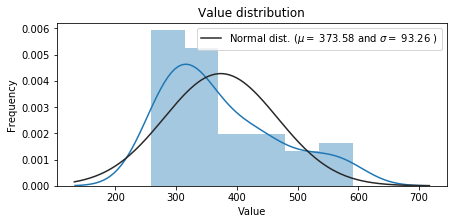

In [6]:
# Plot Histogram
fig = plt.figure(figsize=(7,3))

sns.distplot(df['Value'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Value'])
print( f'\n μ: mu : mean = {mu:.2f} \n σ: sigma : std = {sigma:.2f}\n')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Value distribution')

Skewness: 0.8537034309634989
Kurtosis: -0.2852966058472792


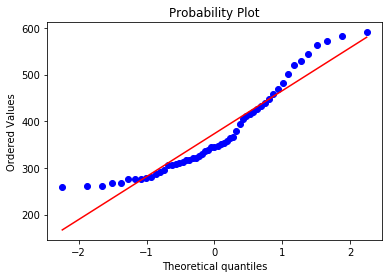

In [7]:
res = stats.probplot(df['Value'], plot=plt)

print(f"Skewness: {df['Value'].skew()}")
print(f"Kurtosis: {df['Value'].kurt()}")

Skewness: 0.8537034309634989
Kurtosis: -0.2852966058472792


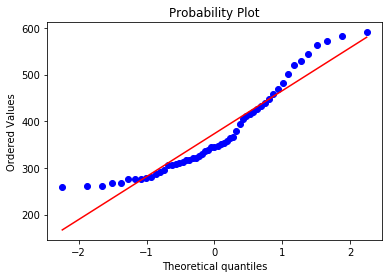

In [8]:
res = stats.probplot(df['Value'], plot=plt)

print(f"Skewness: {df['Value'].skew()}")
print(f"Kurtosis: {df['Value'].kurt()}")

# Polynomial regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
X = df.Year.values
y = df.Value.values

In [11]:
from sklearn.model_selection import train_test_split

train, test, y_train, y_test = train_test_split(X, y)

In [ ]:
np.polyfit(np.log(train), y_train, 1)

In [12]:
train = train.reshape(-1,1)
test = test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
polynomial_features= PolynomialFeatures(2)
x_poly = polynomial_features.fit_transform(train)
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)
y_poly_pred =  poly_model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)

In [ ]:
rmse

In [ ]:
    plt.title(f'degree {2 } ')
    plt.scatter(train, y_train, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(train,y_poly_pred), key=sort_axis)
    x_new, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_new, y_poly_pred, color='m')
    plt.show()
    plt.close()

In [16]:
degrees = [2,3]
y_poly_pred_list=list()
rmse_r2_list=list()
y_poly_pred_list_test=list()
rmse_r2_list_test=list()
for i in degrees:
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(train)
    x_poly_test = polynomial_features.fit_transform(test)
    poly_model = LinearRegression()
    poly_model.fit(x_poly, y_train)
    y_poly_pred =  poly_model.predict(x_poly)
    y_pred_test  = poly_model.predict(x_poly_test)
    y_poly_pred_list.append(y_poly_pred)
    y_poly_pred_list_test.append(y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    r2 = r2_score(y_train,y_poly_pred)
    r2_test = r2_score(y_test,y_pred_test)
    rmse_r2_list.append((rmse,r2))   
    rmse_r2_list_test.append((rmse_test,r2_test))

In [17]:
rmse_r2_list

[(10.108220710613532, 0.984124093280739),
 (5.662225996908956, 0.9950184613389006)]

In [20]:
rmse_r2_list_test

[(15.789121253901628, 0.9814007818634358),
 (6.116564251774618, 0.9972087813876743)]

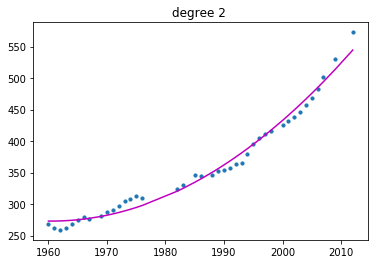

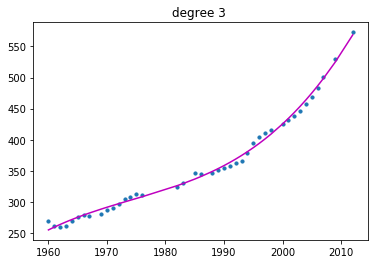

In [18]:
for index,i in zip(degrees,y_poly_pred_list):
    plt.title(f'degree {index } ')
    plt.scatter(train, y_train, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(train,i), key=sort_axis)
    x_new, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_new, y_poly_pred, color='m')
    plt.show()
    plt.close()


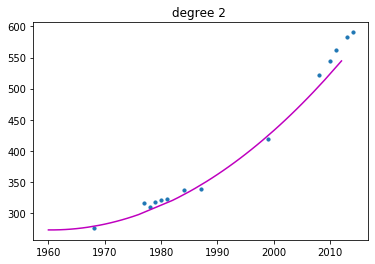

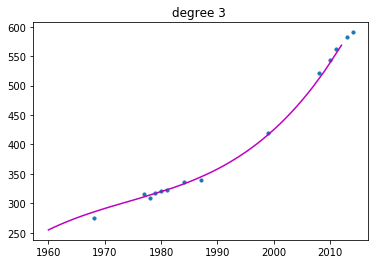

In [19]:
for index,i in zip(degrees,y_poly_pred_list):
    plt.title(f'degree {index } ')
    plt.scatter(test, y_test, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(train,i), key=sort_axis)
    x_new, y_poly_pred = zip(*sorted_zip)
    plt.plot(x_new, y_poly_pred, color='m')
    plt.show()
    plt.close()


In [24]:
df.Value[0]

268.59105842341677

In [51]:
poly_model.predict(polynomial_features.fit_transform([[2013]]))

array([[584.50172449]])

In [52]:
inv_boxcox1p(poly_model.predict(polynomial_features.fit_transform([[2013]])), 0.15 )

array([[9.66829204e+12]])

In [53]:
df[df.Year==2013]

,Year,Value
53,2013,9.490603e+12
